In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Data Preprocessing

An instance of the Player class below stores data from all of the various angles of video from which data was collected

In [2]:
class Player:
    def __init__(self):
        self.front = []
        self.rear = []
        self.side_faceon = []
        self.side_back = []

The load_data function itterates through the directory where the data is stored. It calls the sore_dataframe function which is used to store the data in the correct instance of the different player objects.

In [3]:
def load_data():
    rootdir = 'Data'
    male_a = Player()
    male_b = Player()
    female_a = Player()
    female_b = Player()

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(subdir, file))
                store_dataframe(df,subdir,male_a,male_b,female_a,female_b)
    
    return male_a,male_b,female_a,female_b

The store_dataframe function takes in the dataframe and the sub-directory of the file from which the data has come from aswell as the player instances which we wish to update. The dataframe is then apended to the player and angle which it belongs in based off the subdirectory the data came from.

In [4]:
def store_dataframe(df,subdir,male_a,male_b,female_a,female_b):
    if "Federer" in subdir:
        if "Front" in subdir:
            male_a.front.append(df)
        if "Rear" in subdir:
            male_a.rear.append(df)
        if "Side_Back" in subdir:
            male_a.side_back.append(df)
        if "Side_FaceOn" in subdir:
            male_a.side_faceon.append(df)
    
    if "Nadal" in subdir:
        if "Front" in subdir:
            male_b.front.append(df)
        if "Rear" in subdir:
            male_b.rear.append(df)
        if "Side_Back" in subdir:
            male_b.side_back.append(df)
        if "Side_FaceOn" in subdir:
            male_b.side_faceon.append(df)
    
    if "Williams" in subdir:
        if "Front" in subdir:
            female_a.front.append(df)
        if "Rear" in subdir:
            female_a.rear.append(df)
        if "Side_Back" in subdir:
            female_a.side_back.append(df)
        if "Side_FaceOn" in subdir:
            female_a.side_faceon.append(df)
    
    if "Wozniacki" in subdir:
        if "Front" in subdir:
            female_b.front.append(df)
        if "Rear" in subdir:
            female_b.rear.append(df)
        if "Side_Back" in subdir:
            female_b.side_back.append(df)
        if "Side_FaceOn" in subdir:
            female_b.side_faceon.append(df)

The load_key_pose_scores function reads in the frames for each video at which each of the key poses of the serves occured at. It then looks through each of the files and stores the relevent scores at the particular frames of the key poses.

In [5]:
def load_key_pose_scores():
    rootdir = 'Data'
    key_points = pd.read_csv('key_poses.csv')
    key_pose_scores = pd.DataFrame(columns=['POSE','UPPER BODY', 'LOWER BODY', 'PCJ'])

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(subdir, file))
                for index, row in key_points.iterrows():
                    if row[0] == file:
                        key_pose_scores = key_pose_scores.append({'POSE' : 'START', 'UPPER BODY' : int(df.iloc[key_points.iloc[index][2]-1][1]), 'LOWER BODY' : int(df.iloc[key_points.iloc[index][2]-1][2]), 'PCJ' : df.iloc[key_points.iloc[index][2]-1][3]}, ignore_index=True)
                        key_pose_scores = key_pose_scores.append({'POSE' : 'RELEASE', 'UPPER BODY' : int(df.iloc[key_points.iloc[index][3]-1][1]), 'LOWER BODY' : int(df.iloc[key_points.iloc[index][3]-1][2]), 'PCJ' : df.iloc[key_points.iloc[index][3]-1][3]}, ignore_index=True)
                        key_pose_scores = key_pose_scores.append({'POSE' : 'CONTACT', 'UPPER BODY' : int(df.iloc[key_points.iloc[index][4]-1][1]), 'LOWER BODY' : int(df.iloc[key_points.iloc[index][4]-1][2]), 'PCJ' : df.iloc[key_points.iloc[index][4]-1][3]}, ignore_index=True)
                        key_pose_scores = key_pose_scores.append({'POSE' : 'LANDING', 'UPPER BODY' : int(df.iloc[key_points.iloc[index][5]-1][1]), 'LOWER BODY' : int(df.iloc[key_points.iloc[index][5]-1][2]), 'PCJ' : df.iloc[key_points.iloc[index][5]-1][3]}, ignore_index=True)
                        
    return key_pose_scores

In [6]:
# Load data into all the player objects for each angle of video
# key_pose_scores will store the score for a players pose at certain  keypoints of the serve
male_a,male_b,female_a,female_b = load_data()
key_pose_scores = load_key_pose_scores()

players = [male_a,male_b,female_a,female_b]

# Results

### Overall PCJ
The calculate_PCJ function calculates the precision of the pose estimation model in predicting the joint locations on a person given a set of videos for an inputted player.

In [7]:
#precision of the model on a particular player
#iterates through each dataframe and calculates the precision
def calculate_PCJ(player):
    total = 0.0
    num_of_videos = 0
    
    for video in player.front + player.rear + player.side_back + player.side_faceon:
        total += video["PCJ"].mean()
        num_of_videos += 1

    return total / num_of_videos

In [8]:
# The precision of the model on the joints of a player calculated here
total = 0

for player in players:
    total += calculate_PCJ(player)
    
print("PCJ precision across all videos = {}".format(total/len(players)))

PCJ precision across all videos = 0.5118677539146403


### PCJ For Each Angle
The angle_PCJ function will calculate the precision of the pose estimation model in predicting the joint locations on a person using videos only recorded from a particular inputted angle.

In [9]:
def angle_PCJ(angle):
    total = 0.0
    num_of_videos = 0
    
    for player in players:
        angles = {
            "Front" : player.front,
            "Rear" : player.rear,
            "Side_FaceOn" : player.side_faceon,
            "Side_Back" : player.side_back
        }
        for video in angles[angle]:
            total += video["PCJ"].mean()
            num_of_videos += 1
            
    return total / num_of_videos

In [10]:
print("PCJ from front= " + str(angle_PCJ("Front")))

PCJ from front= 0.5031919858212383


In [11]:
print("PCJ from rear= " + str(angle_PCJ("Rear")))

PCJ from rear= 0.4072483774979559


In [12]:
print("PCJ from side face on= " + str(angle_PCJ("Side_FaceOn")))

PCJ from side face on= 0.6034075679147967


In [13]:
print("PCJ from side back= " + str(angle_PCJ("Side_Back")))

PCJ from side back= 0.5336230844245703


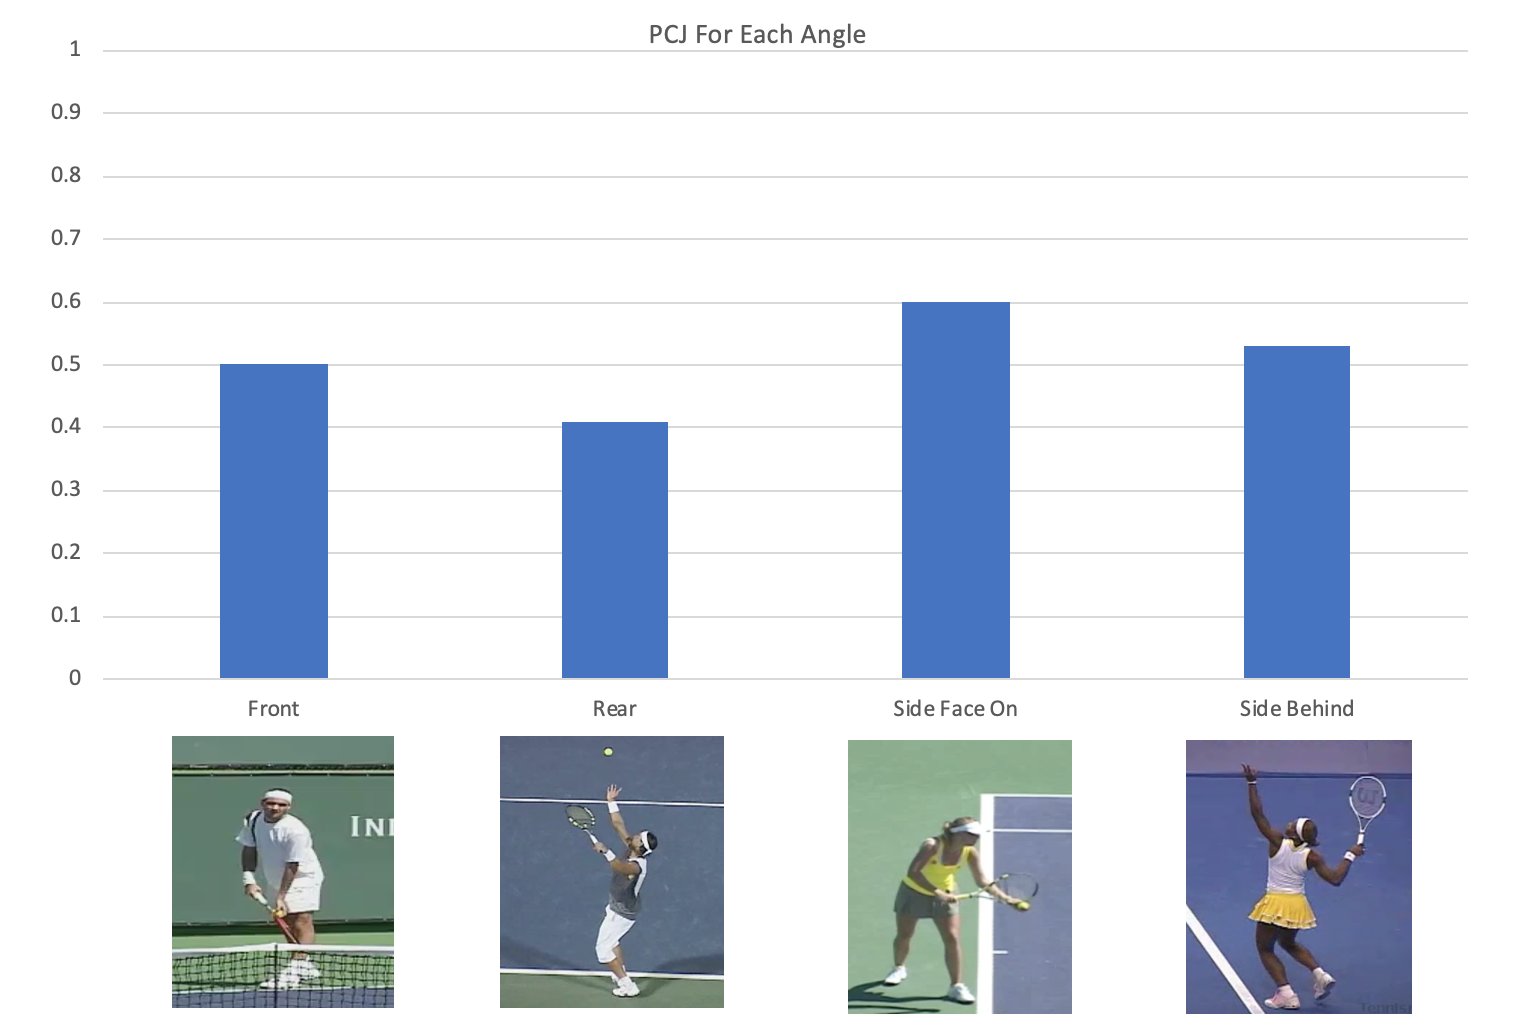

In [14]:
Image(filename='images/angles_barchart.png') 

### PCJ For Upper and Lower Body
The bodypart_PCJ function will calculate the precision of the pose estimation model in predicting the joint locations on a particular part of a persons body, either upper body or lower body.

In [15]:
def bodypart_PCJ(player,part):
    total = 0.0
    num_of_videos = 0
    
    
    for video in player.front + player.rear + player.side_back + player.side_faceon:
        total += (video[part]/6).mean()
        num_of_videos += 1
            
    return total / num_of_videos

In [16]:
total = 0

for player in players:
    total += bodypart_PCJ(player,"UPPER BODY")
    
print("PCJ across all videos for upper body = {}".format(total/len(players)))

PCJ across all videos for upper body = 0.3608473909959951


In [17]:
total = 0

for player in players:
    total += bodypart_PCJ(player,"LOWER BODY")
    
print("PCJ across all videos for lower body = {}".format(total/len(players)))

PCJ across all videos for lower body = 0.6624371789216899


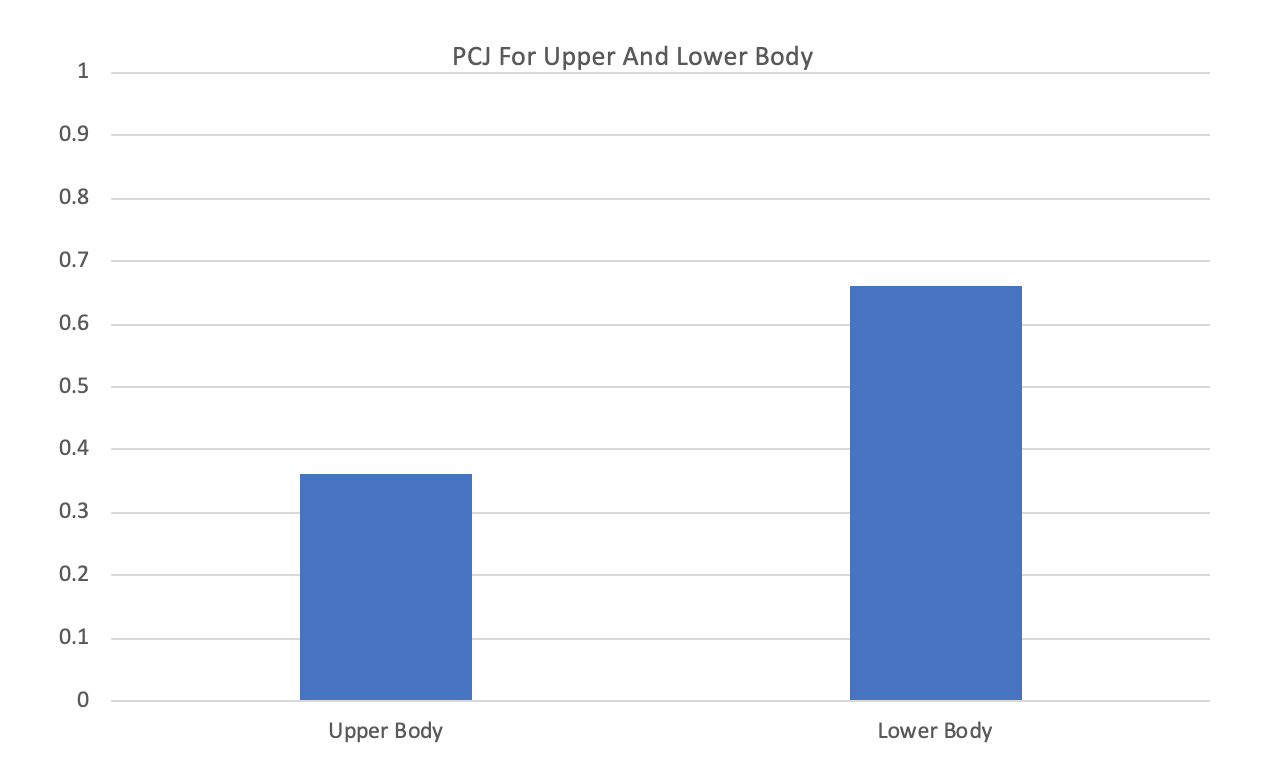

In [18]:
Image(filename='images/upperlower_barchart.png') 

### PCJ For Upper and Lower Body Dependent on Angle
The bodypart_PCJ_for_angle function will calculate the precision of the pose estimation model in predicting the joint locations on a particular part of a persons body, either upper body or lower body using videos only recorded from a particular inputted angle.

In [19]:
def bodypart_PCJ_for_angle(angle,part):
    total = 0.0
    num_of_videos = 0
    
    for video in angle:
        total += (video[part]/6).mean()
        num_of_videos += 1
            
    return total / num_of_videos

In [20]:
total_upper = 0
total_lower = 0

for player in players:
    total_upper += bodypart_PCJ_for_angle(player.front,"UPPER BODY")
    total_lower += bodypart_PCJ_for_angle(player.front,"LOWER BODY")
    
print("PCJ for upper body from front angle= {}".format(total_upper/len(players)))
print("PCJ for lower body from front angle= {}".format(total_lower/len(players)))

PCJ for upper body from front angle= 0.32610337707219866
PCJ for lower body from front angle= 0.6802805946088087


In [21]:
total_upper = 0
total_lower = 0

for player in players:
    total_upper += bodypart_PCJ_for_angle(player.rear,"UPPER BODY")
    total_lower += bodypart_PCJ_for_angle(player.rear,"LOWER BODY")
    
print("PCJ for upper body from rear angle= {}".format(total_upper/len(players)))
print("PCJ for lower body from rear angle= {}".format(total_lower/len(players)))

PCJ for upper body from rear angle= 0.25327582238611984
PCJ for lower body from rear angle= 0.5612209326256326


In [22]:
total_upper = 0
total_lower = 0

for player in players:
    total_upper += bodypart_PCJ_for_angle(player.side_faceon,"UPPER BODY")
    total_lower += bodypart_PCJ_for_angle(player.side_faceon,"LOWER BODY")
    
print("PCJ for upper body from side face on angle= {}".format(total_upper/len(players)))
print("PCJ for lower body from side face on angle= {}".format(total_lower/len(players)))

PCJ for upper body from side face on angle= 0.50544365253981
PCJ for lower body from side face on angle= 0.6995677315183157


In [23]:
total_upper = 0
total_lower = 0

for player in players:
    total_upper += bodypart_PCJ_for_angle(player.side_back,"UPPER BODY")
    total_lower += bodypart_PCJ_for_angle(player.side_back,"LOWER BODY")
    
print("PCJ for upper body from side back angle= {}".format(total_upper/len(players)))
print("PCJ for lower body from side back angle= {}".format(total_lower/len(players)))

PCJ for upper body from side back angle= 0.35856671198585177
PCJ for lower body from side back angle= 0.7086794569340022


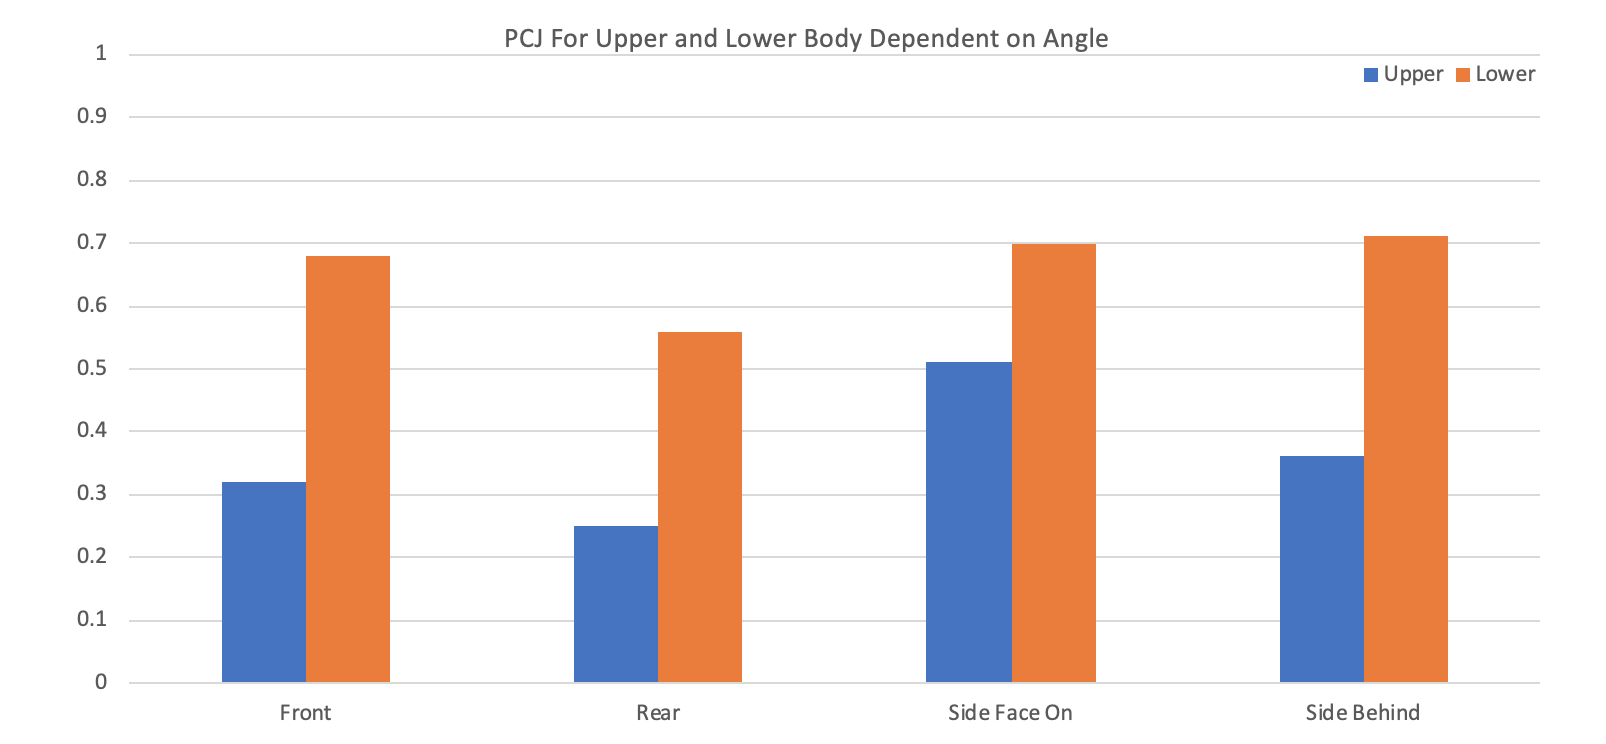

In [25]:
Image(filename='images/upperlower_angles_barchart.png') 

### PCJ For Male and Female Players

In [26]:
print("PCJ for male players= " + str((calculate_PCJ(male_a)+calculate_PCJ(male_b))/2))

PCJ for male players= 0.5361979897900495


In [27]:
print("PCJ for female players= " + str((calculate_PCJ(female_a)+calculate_PCJ(female_b))/2))

PCJ for female players= 0.48753751803923107


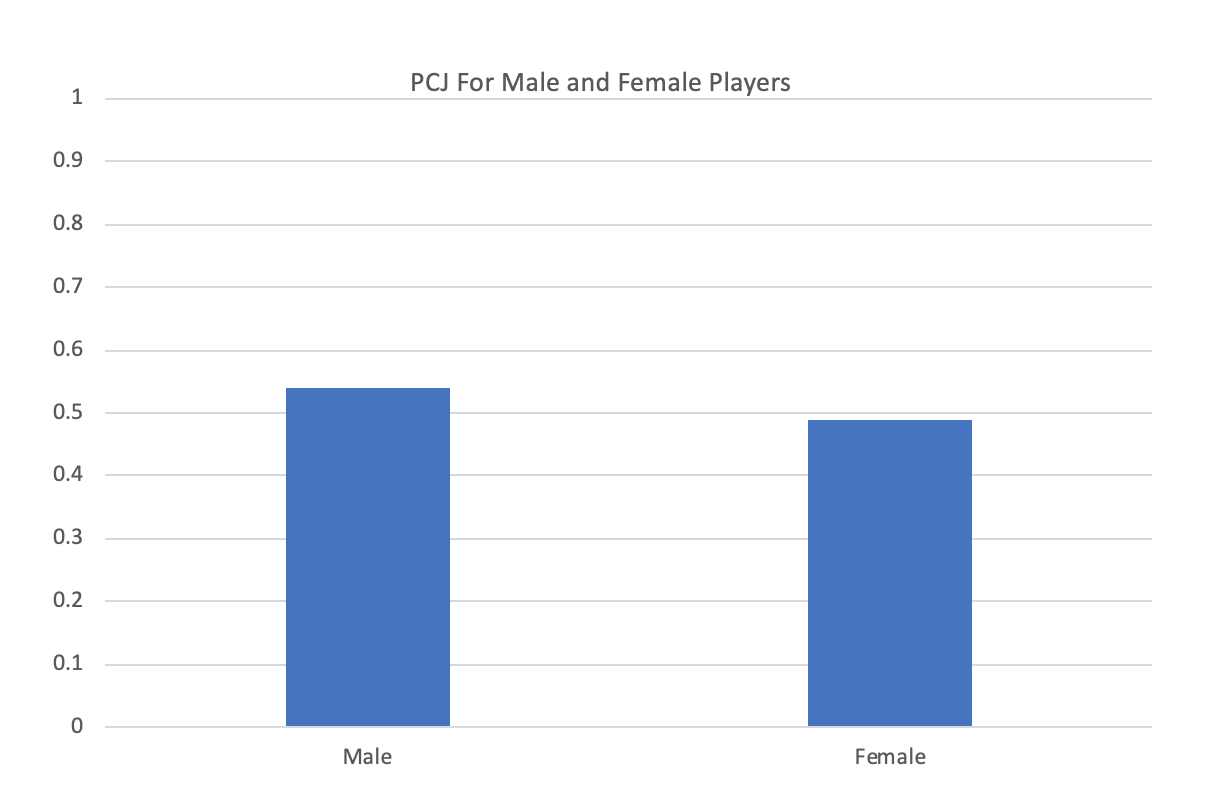

In [28]:
Image(filename='images/gender_barchart.png') 

### PCJ For Right Handed Players and Left Handed Players

In [29]:
total = 0

total += calculate_PCJ(male_a)
total += calculate_PCJ(female_a)
total += calculate_PCJ(female_b)
    
print("PCJ precision for right handed players = {}".format(total/3))

PCJ precision for right handed players = 0.4892622107868004


In [30]:
print("PCJ precision for left handed player = {}".format(calculate_PCJ(male_b)))

PCJ precision for left handed player = 0.5796843832981601


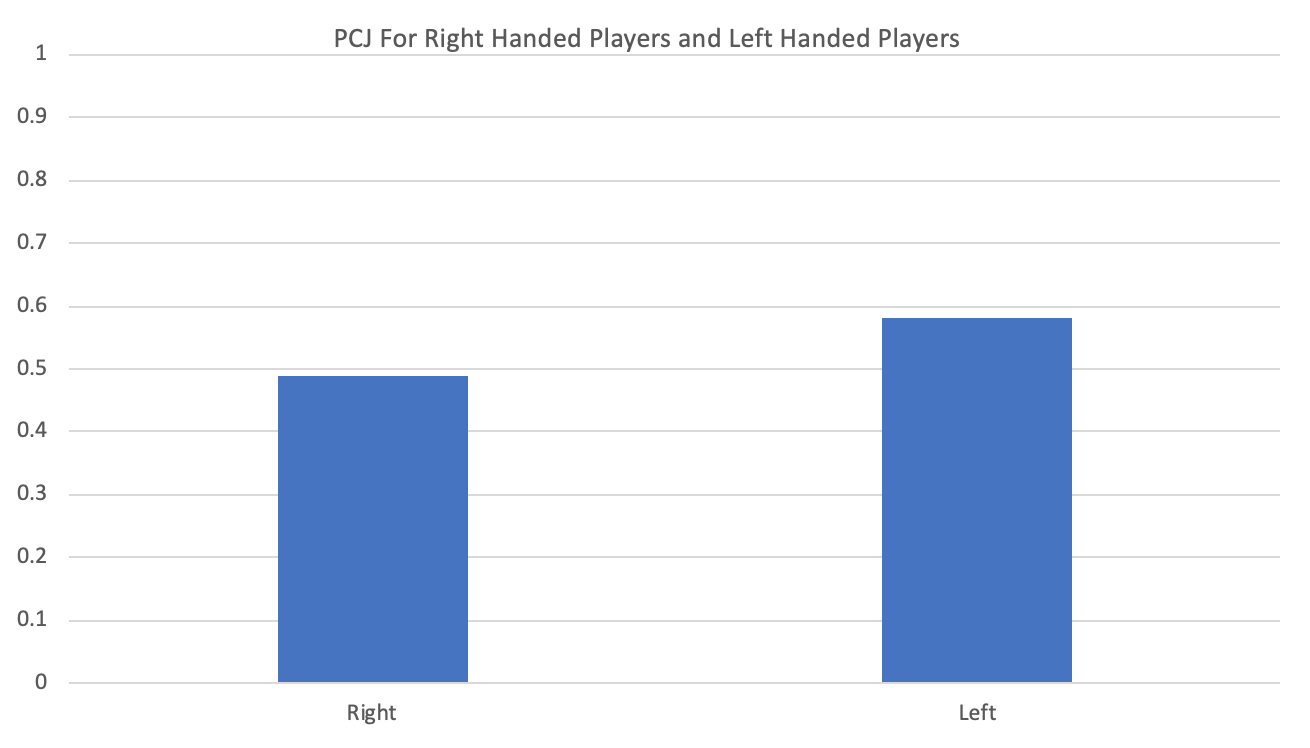

In [31]:
Image(filename='images/hand_barchart.png') 

### PCJ For Key Poses
The key_pose_PCJ function returns the precision of the pose estimation model in predicting the joint locations across all videos on a particular key pose within a serve .

In [32]:
def key_pose_PCJ(pose):
    total = 0
    count = 0
    for index, row in key_pose_scores.iterrows():
        if row[0] == pose:
            total+=key_pose_scores.iloc[index]["PCJ"]
            count+=1
    return total/count

In [33]:
start = key_pose_PCJ("START")
print(start)

0.6059027777083333


In [34]:
release = key_pose_PCJ("RELEASE")
print(release)

0.5763888888958334


In [35]:
contact = key_pose_PCJ("CONTACT")
print(contact)

0.3281250000416665


In [36]:
landing = key_pose_PCJ("LANDING")
print(landing)

0.29166666664583335


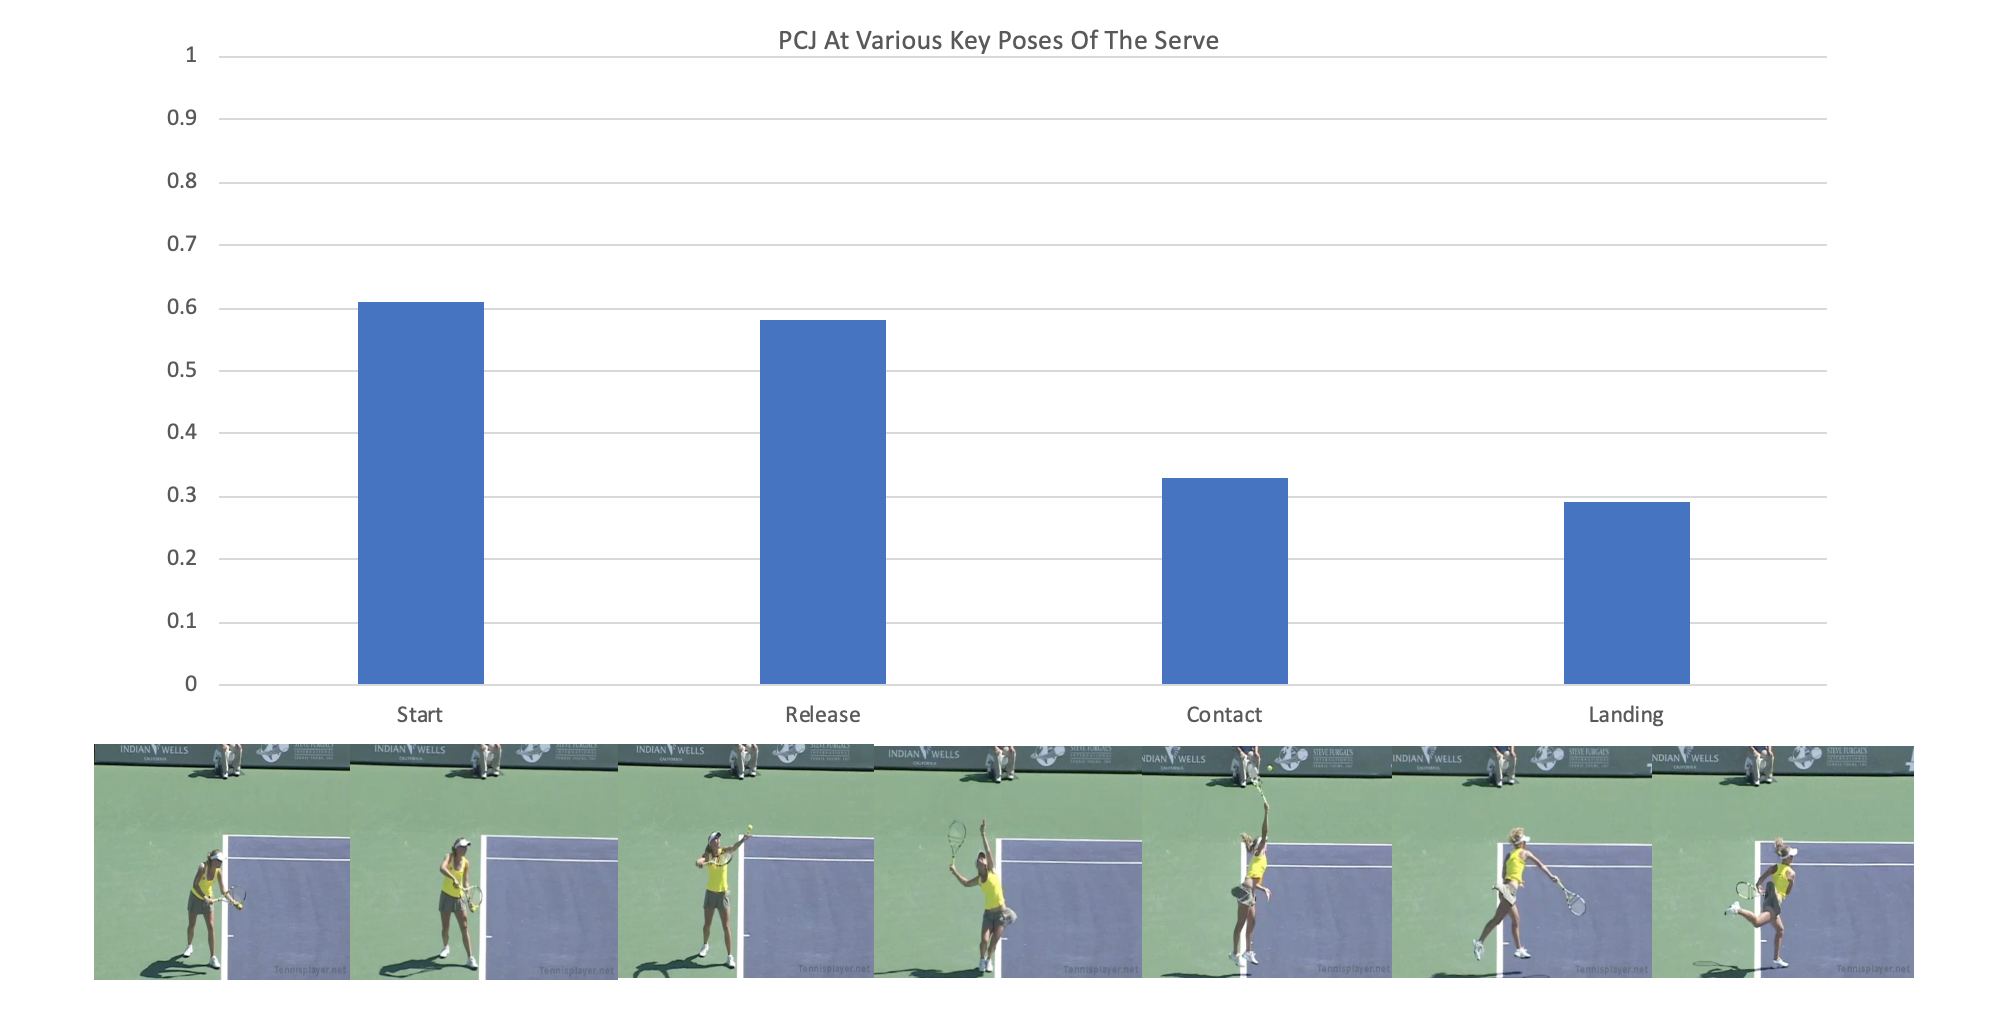

In [39]:
Image(filename='images/keypose2_barchart.png') 